In [132]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt

[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
X shape: (26, 2)


d:\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


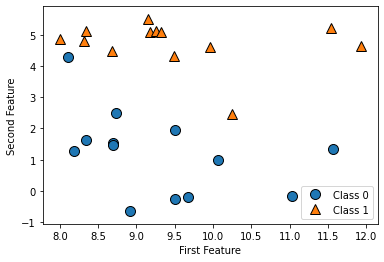

In [133]:
# 1. forge 数据集

# 生成数据集
X, y = mglearn.datasets.make_forge()
print(y)
# 数据集绘图
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
plt.legend(["Class 0", "Class 1"])
print(f"X shape: {X.shape}")



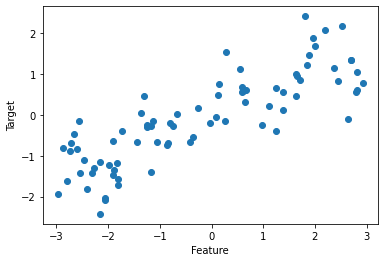

In [134]:
# 2. wave 数据集
X, y = mglearn.datasets.make_wave(n_samples=80)
plt.plot(X, y, 'o')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()


In [135]:
# 3. 威斯康星乳腺癌数据集
from sklearn.datasets import load_breast_cancer

cancer_set = load_breast_cancer()


# 数据集字段
print(f"cancer keys: {cancer_set.keys()}")

# 形状
print(f"Shape of caner data: {cancer_set.data.shape}") 

# 样本标签分布
print(np.bincount(cancer_set.target))   # 两分计数
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer_set.target_names, np.bincount(cancer_set.target))}))

# 特征语义说明
print(f"Feature names:\n {cancer_set.feature_names}")


cancer keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape of caner data: (569, 30)
[212 357]
Sample counts per class:
{'malignant': 212, 'benign': 357}
Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [136]:
# 4. 波士顿房价数据集
from sklearn.datasets import load_boston

boston = load_boston()
print(f"Data shape: {boston.data.shape}")


Data shape: (506, 13)


d:\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`

d:\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


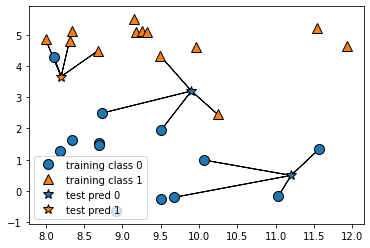

In [137]:
# 3. K 近邻算法

# 3.1 K近邻分类
mglearn.plots.plot_knn_classification(n_neighbors=4)

In [138]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# 导入数据
X, y = mglearn.datasets.make_forge()

# 划分数据
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 分类器实例化
clf = KNeighborsClassifier(n_neighbors=3)
# 分类器拟合
clf.fit(X_train, y_train)

# 预测
print(f"Test set prediction: {clf.predict(X_test)}")

# 测评
print(f"Test set accurary: {clf.score(X_test, y_test):.2f}")

Test set prediction: [1 0 1 0 1 0 0]
Test set accurary: 0.86


d:\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


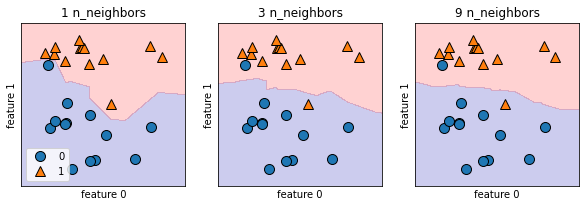

In [139]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbor, ax in zip([1, 3, 9], axs):
  clf = KNeighborsClassifier(n_neighbors=n_neighbor).fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=.8, ax=ax, alpha=.2)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title(f"{n_neighbor} n_neighbors")
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")
  
axs[0].legend(loc=3)

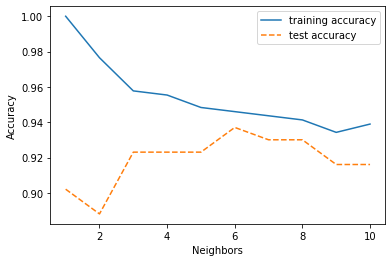

In [140]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

train_accuracy = []
test_accurary = []

neighbor_range = range(1, 11)

for n in neighbor_range:
  # 构建模型
  clf = KNeighborsClassifier(n_neighbors=n)
  clf.fit(X_train, y_train)
  # 记录训练精度
  train_accuracy.append(clf.score(X_train, y_train))
  # 记录测试精度
  test_accurary.append(clf.score(X_test, y_test))
  
plt.plot(neighbor_range, train_accuracy, label='training accuracy')
plt.plot(neighbor_range, test_accurary, linestyle='--', label='test accuracy')
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.legend()

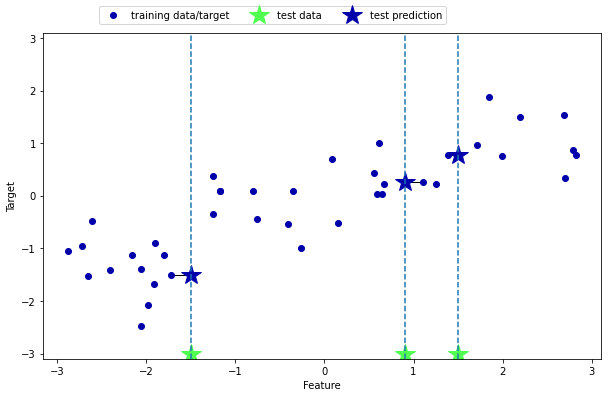

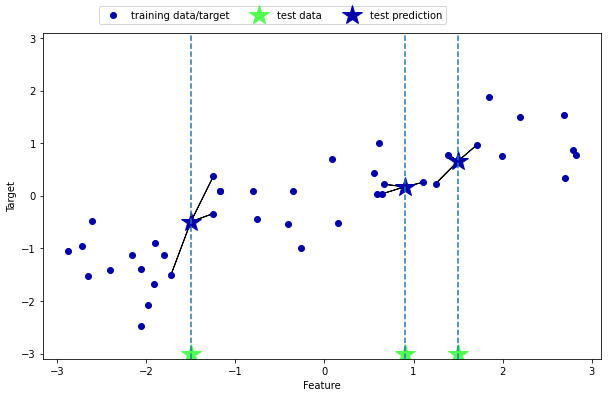

In [141]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

mglearn.plots.plot_knn_regression(n_neighbors=3)


In [142]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

print(f"Test set prediction: \n{reg.predict(X_test)}")

# 测试
print(f"Test Set R^2: {reg.score(X_test, y_test):.2f}")

Test set prediction: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test Set R^2: 0.83


(1000, 1)


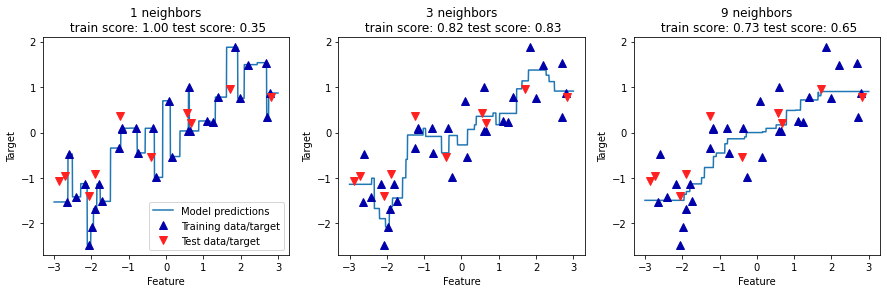

In [143]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

line = np.linspace(-3, 3, 1000).reshape(-1, 1)
print(line.shape)

# 三表
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for n, ax in zip([1, 3, 9], axes):
  reg = KNeighborsRegressor(n_neighbors=n)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8) 
  ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

  ax.set_title(f"{n} neighbors\n train score: {reg.score(X_train, y_train):.2f} test score: {reg.score(X_test, y_test):.2f}")
  ax.set_xlabel("Feature")
  ax.set_ylabel("Target")
  
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc='best')